# **CNN- Cat or Dog?**

Wyczyszczenie katalogu roboczego

In [ ]:
%%bash
rm -rf /content/*

Zaimportowanie bibliotek

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

Pobranie danych

In [ ]:
%%bash
pwd # Aktualny katalog roboczy
wget --quiet https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/cats_and_dogs/dogs-vs-cats.zip
ls

/content
dogs-vs-cats.zip


Wypakowanie danych

In [ ]:
%%bash
unzip /content/dogs-vs-cats.zip

rm -rf sampleSubmission.csv

unzip -q train.zip -d /content/kaggle_original_data
rm -rf train.zip
cp /content/kaggle_original_data/train/* /content/kaggle_original_data
rm -rf /content/kaggle_original_data/train

unzip -q /content/test1.zip
rm -rf test1.zip

ls

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               
dogs-vs-cats.zip
kaggle_original_data
test1


Zdefiniowanie użytecznych funkcji

In [ ]:
# Wykres dokładności modelu na zbiorze treningowym i walidacyjnym
def make_accuracy_plot(history):
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(10, 8))
  plt.plot(epochs, acc, label="Dokładność dopasowania", marker='o')
  plt.plot(epochs, val_acc, label="Dokładność walidacji", marker='o')
  plt.legend()
  plt.title("Dokładność trenowania i walidacji")
  plt.xlabel("Epoki")
  plt.ylabel("Dokładność")
  plt.show()

# Wykres straty modelu na zbiorze treningowym i walidacyjnym
def make_loss_plot(history):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure(figsize=(10, 8))
  plt.plot(epochs, loss, label="Strata trenowania", marker='o')
  plt.plot(epochs, val_loss, label="Strata walidacji", marker='o')
  plt.legend()
  plt.title("Strata trenowania i walidacji")
  plt.xlabel("Epoki")
  plt.ylabel("Strata")
  plt.show()

# Wykres przykładowych obrazów uzyskanych za pomocą techniki augmentacji danych
def display_augmented_images(directory, index):
  fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
  img_path = fnames[index]
  img = image.load_img(img_path, target_size=(150,150))

  x = image.img_to_array(img)
  x = x.reshape((1, ) + x.shape)

  i = 1
  plt.figure(figsize=(20,14))
  for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3,4,i)
    plt.grid(False)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 13 == 0:
      break

Przygotowanie katalogów

In [ ]:
original_dataset_dir = '/content/kaggle_original_data'
base_dir = '/content/cats_and_dogs'

if not os.path.exists(base_dir):
  os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

for directory in (train_dir, valid_dir, test_dir):
  if not os.path.exists(directory):
    os.mkdir(directory)

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

dirs = [train_cats_dir, train_dogs_dir, valid_cats_dir, valid_dogs_dir, test_cats_dir, test_dogs_dir]

for directory in dirs:
  if not os.path.exists(directory):
    os.mkdir(directory)

In [ ]:
# rozdzielamy zdjęcia kotów
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(valid_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

# rozdzielamy zdjęcia psów
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(valid_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

Przyjrzenie się przykładowym obrazom kotów

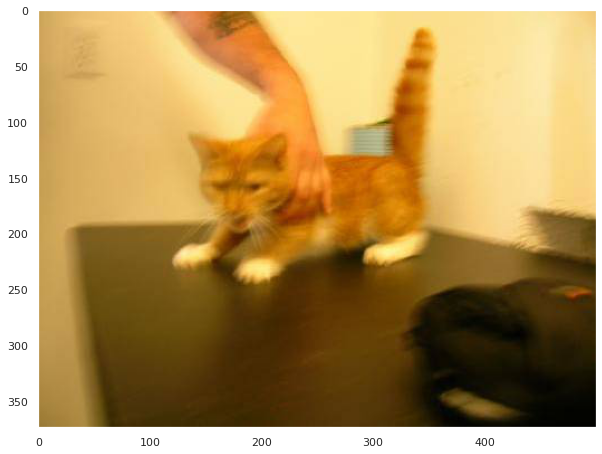

In [ ]:
#@title Wybierz indeks zdjęcia
from keras.preprocessing import image

index = 0 #@param {type:'slider', min:0, max:999}
img_path = '/content/cats_and_dogs/train/cats/cat.' + str(index) + '.jpg'

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)
plt.show()

Przyjrzenie się przykładowym zdjęciom psów

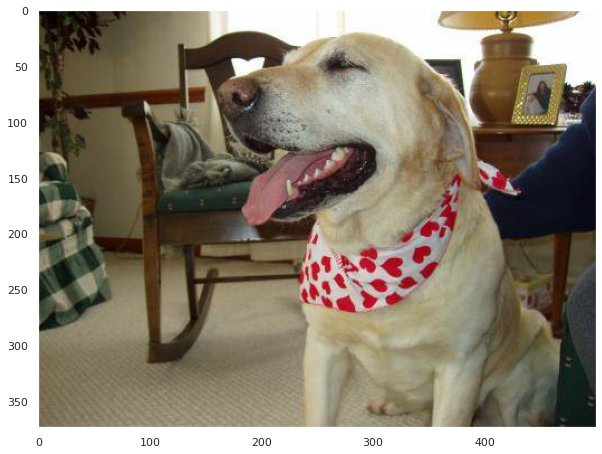

In [ ]:
#@title Wybierz indeks zdjęcia
from keras.preprocessing import image

index = 678 #@param {type:'slider', min:0, max:999}
img_path = '/content/cats_and_dogs/train/dogs/dog.' + str(index) + '.jpg'

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)
plt.show()

Budowa modelu

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

Kompilacja modelu

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Przetworzenie danych do modelu

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Sprawdzenie poprawności kształtu danych treningowych

In [ ]:
for data_batch, labels_batch in train_generator:
  print('Kształt danych wsadowych', data_batch.shape)
  print('Kształt etykiet danych wsadowych', labels_batch.shape)
  break

Kształt danych wsadowych (20, 150, 150, 3)
Kształt etykiet danych wsadowych (20,)


Dopasowanie modelu

In [ ]:
import time

tic = time.time()
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=valid_generator,
                              validation_steps=50)

toc = time.time()
print('Czas przetwarzania {}'.format(toc-tic))
model.save('cats_and_dogs_small_1.h5')

Epoch 1/10
100/100 [==============================] - 107s 1s/step - loss: 0.6818 - accuracy: 0.5620 - val_loss: 0.6563 - val_accuracy: 0.6120
Epoch 2/10
100/100 [==============================] - 107s 1s/step - loss: 0.6394 - accuracy: 0.6295 - val_loss: 0.6531 - val_accuracy: 0.5770
Epoch 3/10
100/100 [==============================] - 109s 1s/step - loss: 0.5930 - accuracy: 0.6845 - val_loss: 0.6168 - val_accuracy: 0.6380
Epoch 4/10
100/100 [==============================] - 108s 1s/step - loss: 0.5528 - accuracy: 0.7185 - val_loss: 0.5934 - val_accuracy: 0.6790
Epoch 5/10
100/100 [==============================] - 108s 1s/step - loss: 0.5203 - accuracy: 0.7340 - val_loss: 0.5655 - val_accuracy: 0.6980
Epoch 6/10
100/100 [==============================] - 108s 1s/step - loss: 0.4919 - accuracy: 0.7500 - val_loss: 0.6577 - val_accuracy: 0.6520
Epoch 7/10
100/100 [==============================] - 108s 1s/step - loss: 0.4732 - accuracy: 0.7720 - val_loss: 0.5736 - val_accuracy: 0.6920

Wykres dokładności trenowania i walidacji

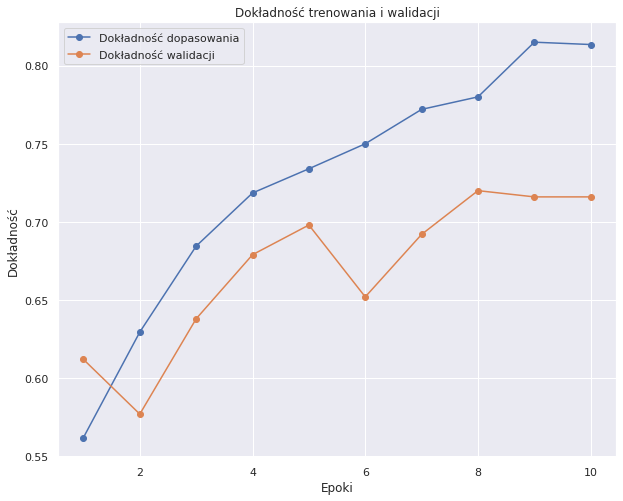

In [ ]:
make_accuracy_plot(history)

Wykres straty trenowania i walidacji

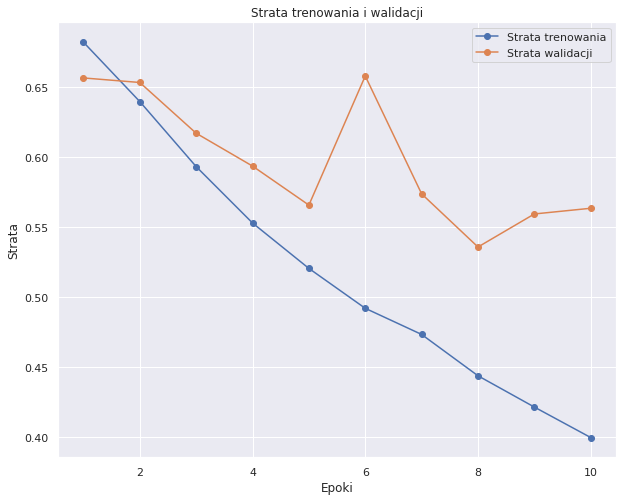

In [ ]:
make_loss_plot(history)

Augmentacja danych

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,      # zakres kąta o który losowo zostanie wykonany obrót obrazów
                             width_shift_range=0.2,  # pionowe przekształcenie obrazu
                             height_shift_range=0.2, # poziome przekształcenie obrazu
                             shear_range=0.2,        # zakres losowego przyciania obrazu
                             zoom_range=0.2,         # zakres losowego przybliżania obrazu
                             horizontal_flip=True,   # losowe odbicie połowy obrazu w płaszczyźnie poziomej
                             fill_mode='nearest')    # strategia wypełniania nowo utworzonych pikseli, które mogą powstać w wyniku operacji

Wyświetlenie kilku przykładów augmentacji - koty

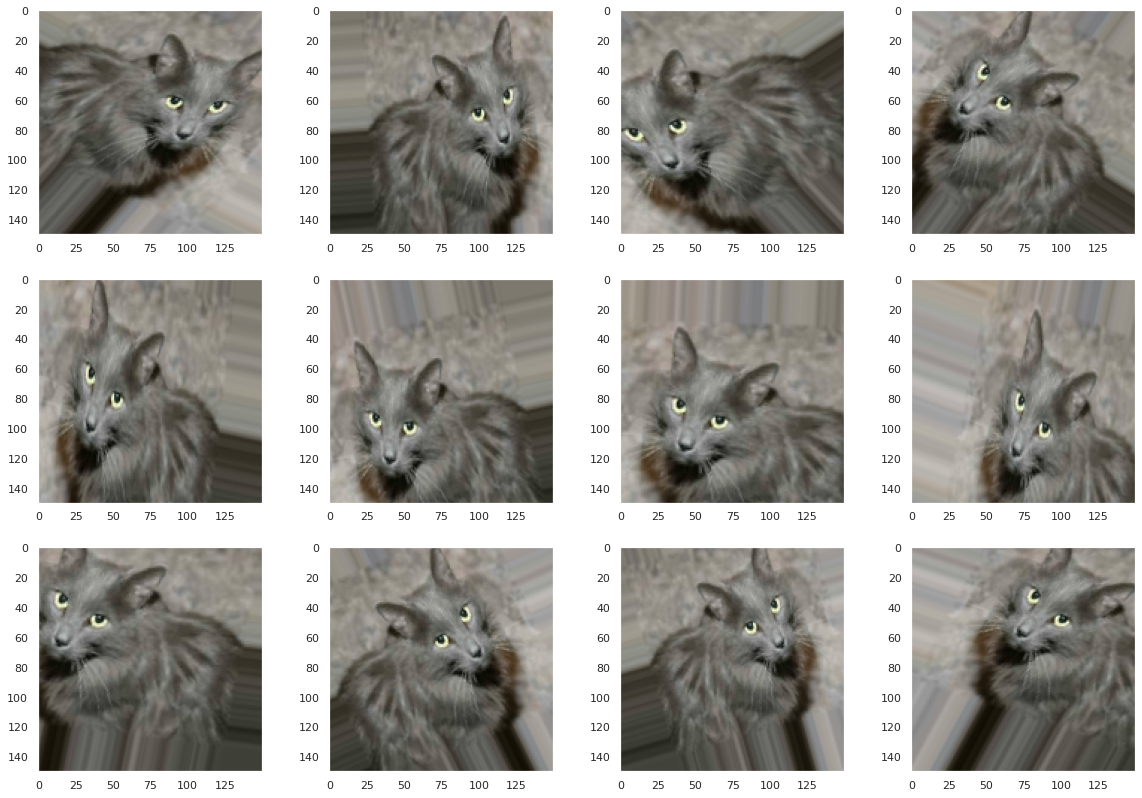

In [ ]:
#@title Wybierz index obrazka w celu jego eksploracji
from keras.preprocessing import image

index = 189 #@param {type:'slider', min:0, max:999}
display_augmented_images(train_cats_dir, index)

Wyświetlnie kilku przykładów augmentacji - psy

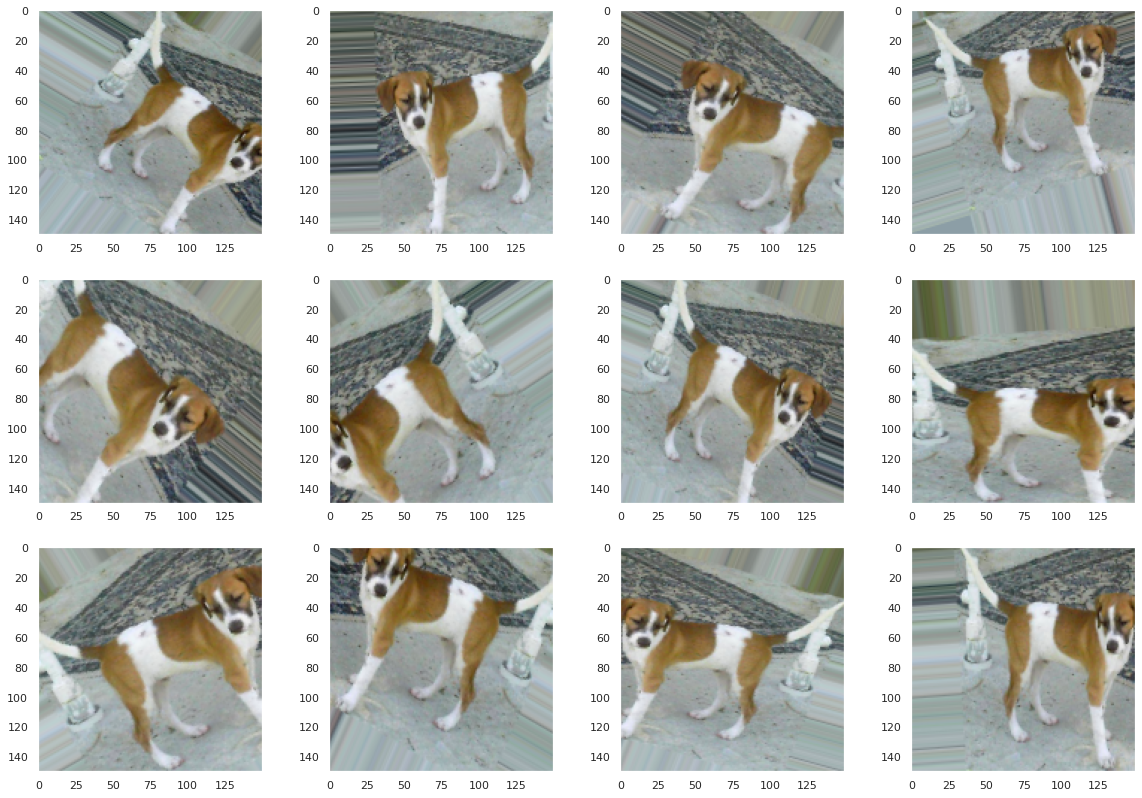

In [ ]:
index = 333 #@param {type:'slider', min:0, max:999}
display_augmented_images(train_dogs_dir, index)

Trenowanie konwolucyjnej sieci neuronowej wykorzystując augmentację danych

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# nie modyfikujemy danych walidacyjnych
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Trenowanie modelu

In [ ]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=valid_generator,
                              validation_steps=50)

Epoch 1/10
100/100 [==============================] - 22s 217ms/step - loss: 0.6091 - accuracy: 0.6880 - val_loss: 0.6408 - val_accuracy: 0.6260
Epoch 2/10
100/100 [==============================] - 21s 215ms/step - loss: 0.5980 - accuracy: 0.6900 - val_loss: 0.5192 - val_accuracy: 0.7790
Epoch 3/10
100/100 [==============================] - 22s 216ms/step - loss: 0.5760 - accuracy: 0.7195 - val_loss: 0.4922 - val_accuracy: 0.7650
Epoch 4/10
100/100 [==============================] - 22s 218ms/step - loss: 0.5731 - accuracy: 0.7035 - val_loss: 0.5277 - val_accuracy: 0.7430
Epoch 5/10
100/100 [==============================] - 22s 218ms/step - loss: 0.5784 - accuracy: 0.7105 - val_loss: 0.5418 - val_accuracy: 0.7310
Epoch 6/10
100/100 [==============================] - 21s 215ms/step - loss: 0.5657 - accuracy: 0.7165 - val_loss: 0.5229 - val_accuracy: 0.7300
Epoch 7/10
100/100 [==============================] - 21s 215ms/step - loss: 0.5784 - accuracy: 0.7040 - val_loss: 0.4909 - val_ac

Zapisanie modelu

In [ ]:
model.save('cats_and_dogs_small_2.h5')

Wykres dokładności trenowania i walidacji

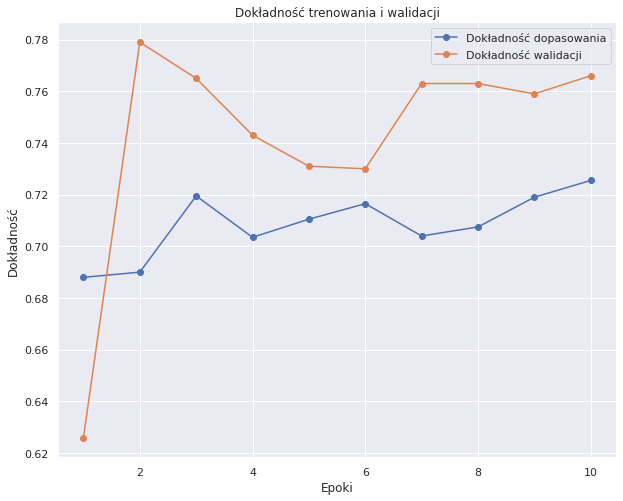

In [ ]:
make_accuracy_plot(history)

Wykres straty i walidacji

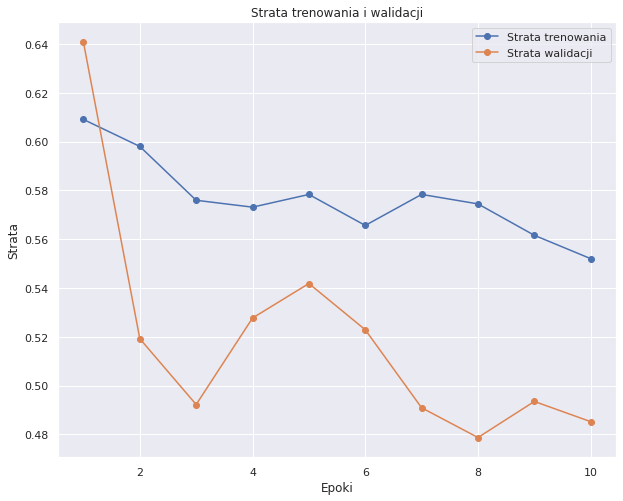

In [ ]:
make_loss_plot(history)

Transfer learning - korzystanie z uprzednio przetrenowanego modelu

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

conv_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

Ekstracja cech z augmentacją danych

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


Trenowanie modelu od początku do końca przy zamrożonej bazie konwolucyjnej

In [ ]:
print('Liczba wag poddawanych trenowaniu przed zamrożeniem bazy:', len(model.trainable_weights))
conv_base.trainable = False
print('Liczba wag poddawanych trenowaniu po zamrożeniu bazy:', len(model.trainable_weights))

Liczba wag poddawanych trenowaniu przed zamrożeniem bazy: 4
Liczba wag poddawanych trenowaniu po zamrożeniu bazy: 4


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# nie modyfikujemy danych walidacyjnych
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=valid_generator,
                              validation_steps=50,
                              verbose=2)

Epoch 1/10
100/100 - 30s - loss: 0.9115 - accuracy: 0.6715 - val_loss: 0.3607 - val_accuracy: 0.8370 - 30s/epoch - 301ms/step
Epoch 2/10
100/100 - 26s - loss: 0.5266 - accuracy: 0.7575 - val_loss: 0.3427 - val_accuracy: 0.8470 - 26s/epoch - 255ms/step
Epoch 3/10
100/100 - 25s - loss: 0.4539 - accuracy: 0.7935 - val_loss: 0.3432 - val_accuracy: 0.8480 - 25s/epoch - 254ms/step
Epoch 4/10
100/100 - 26s - loss: 0.4211 - accuracy: 0.8075 - val_loss: 0.2661 - val_accuracy: 0.8870 - 26s/epoch - 255ms/step
Epoch 5/10
100/100 - 25s - loss: 0.4006 - accuracy: 0.8260 - val_loss: 0.2887 - val_accuracy: 0.8660 - 25s/epoch - 255ms/step
Epoch 6/10
100/100 - 25s - loss: 0.3608 - accuracy: 0.8400 - val_loss: 0.3643 - val_accuracy: 0.8510 - 25s/epoch - 255ms/step
Epoch 7/10
100/100 - 26s - loss: 0.3473 - accuracy: 0.8405 - val_loss: 0.3207 - val_accuracy: 0.8680 - 26s/epoch - 256ms/step
Epoch 8/10
100/100 - 26s - loss: 0.3524 - accuracy: 0.8400 - val_loss: 0.2464 - val_accuracy: 0.9050 - 26s/epoch - 257

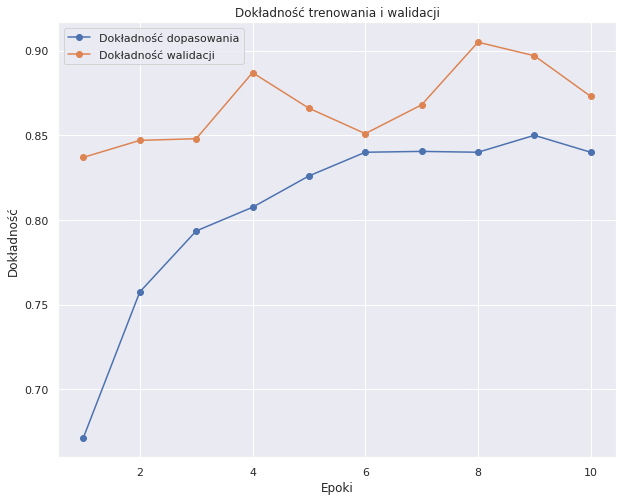

In [ ]:
make_accuracy_plot(history)

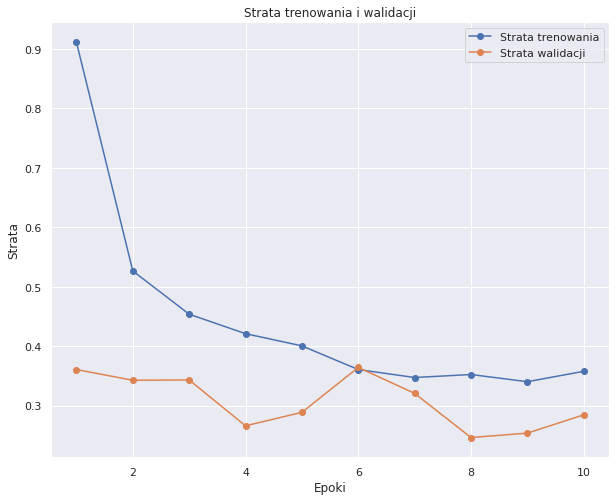

In [ ]:
make_loss_plot(history)

Wizualizacja efektów uczenia sieci konwolucyjnych

In [ ]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
index = 1559
img_path = '/content/cats_and_dogs/test/cats/cat.' + str(index) + '.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


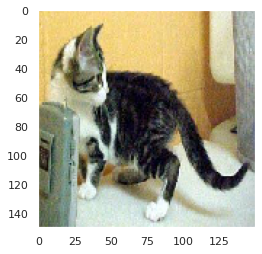

In [ ]:
plt.imshow(img_tensor[0])
plt.grid(False)

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation =activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


Wyświetlanie map cech

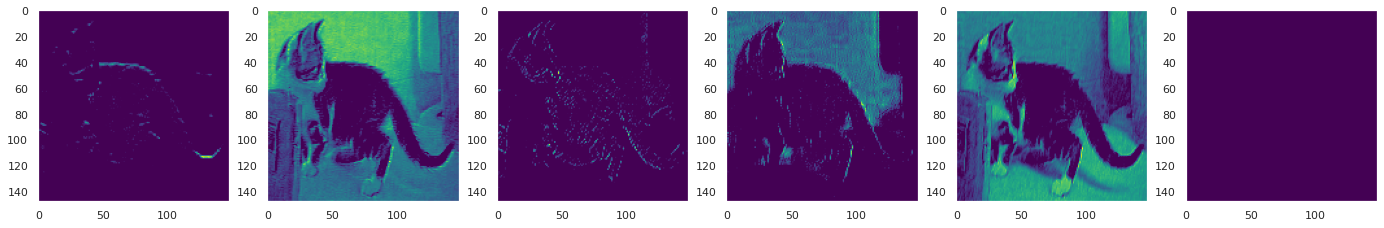

In [ ]:
plt.figure(figsize=(24,24))

for i in range(1,7):
  plt.subplot(1,6,i)
  plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
  plt.grid(False)